In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

# Loading data

In [2]:
# loading metadata

root_path = './dataset'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

c:\users\gourav\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332458 entries, 0 to 332457
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          332458 non-null  object 
 1   sha               116926 non-null  object 
 2   source_x          332458 non-null  object 
 3   title             332320 non-null  object 
 4   doi               199593 non-null  object 
 5   pmcid             124342 non-null  object 
 6   pubmed_id         175523 non-null  object 
 7   license           332458 non-null  object 
 8   abstract          237480 non-null  object 
 9   publish_time      332142 non-null  object 
 10  authors           321588 non-null  object 
 11  journal           312636 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  117435 non-null  object 
 14  arxiv_id          4273 non-null    object 
 15  pdf_json_files    116926 non-null  object 
 16  pmc_json_files    91

In [4]:
# Fetch all of Json file paths

all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

214951

In [5]:
# Helper Functions

# File Reader Class
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            abs_list = []
            
            # Abstract
            for entry in content['abstract']:
                abs_list.append(entry['text'])
            self.abstract = '\n'.join(abs_list)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}'

In [6]:
# Load the Data into DataFrame

dict_ = {'paper_id': [], 'title': [], 'abstract': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['paper_id'].append(content.paper_id)
    dict_['abstract'].append(content.abstract)
        
    # add the title information, add breaks when needed
    try:
        title = meta_data['title'].values[0]
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'title', 'abstract'])
df_covid.to_csv('covid_abstract.csv')

Processing index: 0 of 214951
Processing index: 21495 of 214951
Processing index: 42990 of 214951
Processing index: 64485 of 214951
Processing index: 85980 of 214951
Processing index: 107475 of 214951
Processing index: 128970 of 214951
Processing index: 150465 of 214951
Processing index: 171960 of 214951
Processing index: 193455 of 214951
Processing index: 214950 of 214951


In [7]:
# Get stored data
df = pd.read_csv('covid_abstract.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76663 entries, 1 to 111121
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  76663 non-null  int64 
 1   paper_id    76663 non-null  object
 2   title       76663 non-null  object
 3   abstract    76663 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [8]:
# Handling multiple languages

from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0
languages = []

for i in tqdm(range(0,len(df))):
    # split by space into list, take the first x index, join with space
    text = " ".join(df.iloc[i]['abstract'].split(" "))
    lang = "en"
    try:
        lang = detect(text)
    except Exception as e:
        pass
    
    # get the language    
    languages.append(lang)

100%|████████████████████████████████████████████████████████████████████████████| 76663/76663 [19:29<00:00, 65.53it/s]


In [9]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

# drop languages that are not english
df['language'] = languages
df = df[df['language'] == 'en']
del df['language']
df.info()

Total: 76663

{'af': 16,
 'ar': 2,
 'ca': 19,
 'cs': 1,
 'cy': 133,
 'da': 2,
 'de': 523,
 'en': 75041,
 'es': 325,
 'et': 1,
 'fi': 1,
 'fr': 384,
 'hr': 4,
 'hu': 1,
 'id': 4,
 'it': 47,
 'lt': 2,
 'lv': 1,
 'nl': 65,
 'pt': 41,
 'ro': 16,
 'sk': 2,
 'sl': 1,
 'so': 8,
 'sq': 4,
 'sv': 5,
 'sw': 1,
 'tl': 4,
 'tr': 5,
 'vi': 2,
 'zh-cn': 2}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75041 entries, 1 to 111121
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  75041 non-null  int64 
 1   paper_id    75041 non-null  object
 2   title       75041 non-null  object
 3   abstract    75041 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
# Stopwords removal

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

stopwords.extend(custom_stop_words)

In [11]:
# Tokenization
from nltk.tokenize import RegexpTokenizer
regex = RegexpTokenizer('\w+')

# Custom tokenizer that will process the text data
def my_tokenizer(sentence):
    mytokens = regex.tokenize(sentence)
    mytokens = [ word for word in mytokens if word not in stopwords and len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [12]:
tqdm.pandas()
df["abstract"] = df["abstract"].progress_apply(my_tokenizer)

df.head()

c:\users\gourav\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|███████████████████████████████████████████████████████████████████████████| 75041/75041 [01:42<00:00, 730.28it/s]


,Unnamed: 0,paper_id,title,abstract
1,1,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,Feline infectious peritonitis virus FIPV posit...
2,2,00033d5a12240a8684cfe943954132b43434cf48,Detection of Severe Acute Respiratory Syndrome...,Background Amplification viral ribonucleic aci...
4,4,000379d7a7f37a2ccb978862b9f2016bd03259ea,Effect of Nanomaterial Shape on Fabrication of...,approach shape conformal circuit tuned mixing ...
5,5,00039b94e6cb7609ecbddee1755314bcfeb77faa,Plasma inflammatory cytokines and chemokines i...,Severe acute respiratory syndrome SARS recentl...
7,7,0003ddfb7ce19bcb3f38907f69676163b9863535,Caeteris paribus: In search of the “Silent Pro...,value professional identity interesting territ...


c:\users\gourav\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    74420.000000
mean       126.753453
std        105.213354
min          1.000000
25%         79.000000
50%        112.000000
75%        147.000000
max       4265.000000
Name: abstract_word_count, dtype: float64

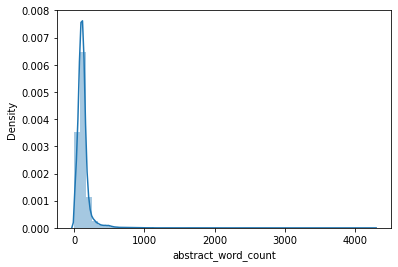

In [13]:
# Handle Possible Duplicates
df.drop_duplicates(['abstract'], inplace=True)
df.describe()


# Adding word count columns for abstract
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.strip().split()))  
df.head()

df = df[df['abstract_word_count'] > 0]

# Word count in the papers
import seaborn as sns
sns.distplot(df['abstract_word_count'])
df['abstract_word_count'].describe()

In [14]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [15]:
text = df['abstract'].values
X = vectorize(text, 2 ** 7)
print(X.shape)

(74420, 128)


In [17]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
X_reduced = pca.fit_transform(X.toarray())
X_reduced.shape

(74420, 83)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,

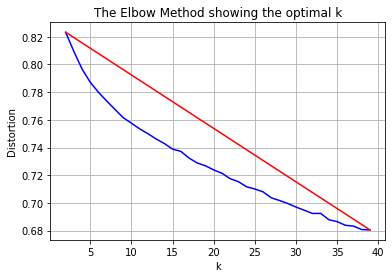

In [18]:
# Clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 40)
for k in K:
    print(k, end=',')
    k_means = KMeans(n_clusters=k).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid('on')
plt.show()

In [19]:
# Run k-means clustering

k = 10
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred
df.head()

,Unnamed: 0,paper_id,title,abstract,abstract_word_count,y
1,1,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,Feline infectious peritonitis virus FIPV posit...,94,4
2,2,00033d5a12240a8684cfe943954132b43434cf48,Detection of Severe Acute Respiratory Syndrome...,Background Amplification viral ribonucleic aci...,121,8
4,4,000379d7a7f37a2ccb978862b9f2016bd03259ea,Effect of Nanomaterial Shape on Fabrication of...,approach shape conformal circuit tuned mixing ...,170,6
5,5,00039b94e6cb7609ecbddee1755314bcfeb77faa,Plasma inflammatory cytokines and chemokines i...,Severe acute respiratory syndrome SARS recentl...,93,8
7,7,0003ddfb7ce19bcb3f38907f69676163b9863535,Caeteris paribus: In search of the “Silent Pro...,value professional identity interesting territ...,80,0


In [20]:
print(df['title'][2])
print(df['title'][5])

Detection of Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2) by Mass Spectrometry
Plasma inflammatory cytokines and chemokines in severe acute respiratory syndrome
